<h1> Hands-on Activity 11.1 | Prepare a Dataset for LSTM and CNN </h1>
Name: Nicolas, Sean Julian S.<br>
Course and Section: CPE019S3 <br>
Instructor: Engr. Roman Richard <br>
Date Performed: May 4, 2024 <br>
Date Submitted: May 8, 2024 <br>
<hr>

## Objective
- This activity aims to prepare a dataset for LSTM and CNN time series forecasting.

## Intended Learning Outcomes (ILOs)
- Demonstrate how to prepare a dataset suitable for LSTM and CNN.

## Import needed libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error

## Load the dataset and examine it

In [ ]:
dataset = pd.read_csv('/content/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

In [ ]:
print(dataset.head())

             Open   High    Low  Close    Volume Name
Date                                                 
2006-01-03  82.45  82.55  80.81  82.06  11715200  IBM
2006-01-04  82.20  82.50  81.33  81.95   9840600  IBM
2006-01-05  81.40  82.90  81.00  82.50   7213500  IBM
2006-01-06  83.95  85.03  83.41  84.95   8197400  IBM
2006-01-09  84.10  84.25  83.38  83.73   6858200  IBM


## Check for missing values

In [ ]:
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

- There's 1 missing in Open column
- There's 1 missing in Low column

## Satisfy the following condition: Training set (before 2017) and Test set (2017 and beyond)

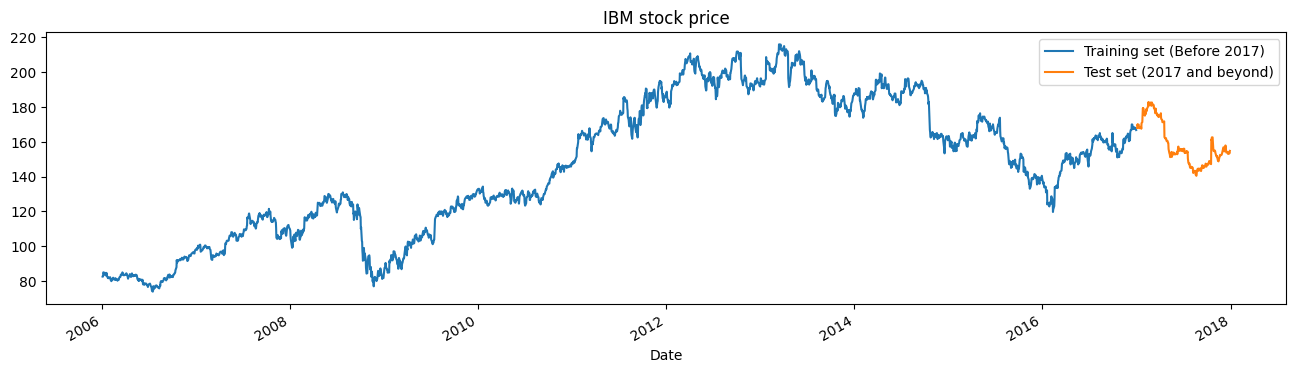

In [ ]:
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

- Used plot to visualize the split of data. Data before 2017 are used for train set and Data after 2017 are used for test set

## Scale the training set from 0 to 1. Use MinMaxScaler and fit_transform function to do this

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

## LSTM stores long-term memory states. To do this, create a data structure with 60 timesteps and 1 output. Thus, for each element of the training set, we shall have 60 previous training set elements

In [ ]:
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

## Reshape the X_train for efficient modeling

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

## LSTM

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
85/85 [==============================] - 30s 144ms/step - loss: 0.0211
Epoch 2/50
85/85 [==============================] - 9s 101ms/step - loss: 0.0101
Epoch 3/50
85/85 [==============================] - 10s 118ms/step - loss: 0.0082
Epoch 4/50
85/85 [==============================] - 10s 116ms/step - loss: 0.0070
Epoch 5/50
85/85 [==============================] - 9s 100ms/step - loss: 0.0064
Epoch 6/50
85/85 [==============================] - 10s 117ms/step - loss: 0.0056
Epoch 7/50
85/85 [==============================] - 10s 116ms/step - loss: 0.0050
Epoch 8/50
85/85 [==============================] - 9s 107ms/step - loss: 0.0048
Epoch 9/50
85/85 [==============================] - 9s 111ms/step - loss: 0.0044
Epoch 10/50
85/85 [==============================] - 11s 135ms/step - loss: 0.0043
Epoch 11/50
85/85 [==============================] - 11s 134ms/step - loss: 0.0038
Epoch 12/50
85/85 [==============================] - 9s 100ms/step - loss: 0.0036
Epoch 13/50
85/85 

In [ ]:
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [ ]:
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 2s 28ms/step


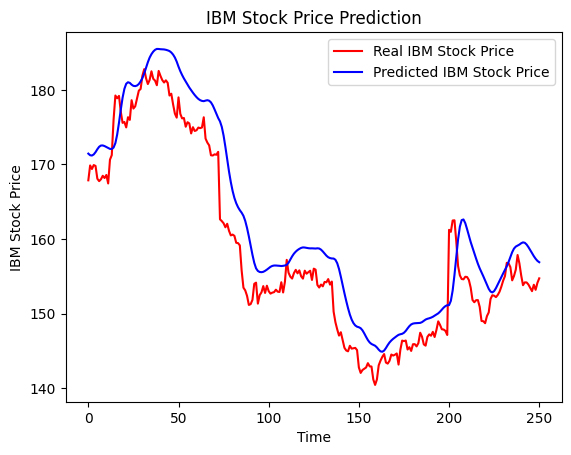

In [ ]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()
plot_predictions(test_set,predicted_stock_price)

- The predicted IBM stock price is able to accurately predict the trend of the stock price looking at the real IBM stock price

In [ ]:
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("RMSE = {}.".format(rmse))

return_rmse(test_set,predicted_stock_price)

RMSE = 4.732782771852954.


## Conclusion
- In this activity I was able to perform the tasks given in order to prepare a dataset for LSTM and CNN time series forecasting. The process includes loading the dataset, checking for missing values, splitting the dataset, scaling, and reshaping. I also learned that LSTM stands for long short-term memory networks. LSTM has feedback connections compared to other feed-forward neural networks. LSTM are commonly used to classify sequential data because they learn long-term dependencies between time steps of data. The RMSE of the LSTM model created earlier resulted with 4.73 RMSE. The graph also shows that the model is able accurately follow the trend of the stock price.